**Intel Image Classification**

->our aim is to classify the given dataset into 6 diferrent classes - glacier, mountain, street, buildings, forest, sea.

->We use the help of external libraries like tensorflow to train a DL network(CNN) and classify the images.

->Dataset is available in kaggle.

In [0]:
#Importing required libraries and functions

import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Dense, Flatten, Dropout, LeakyReLU, ReLU
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import random

**Downloading the image dataset**

Next few blocks of code is to download the image from the kaggle website

In [0]:
! pip install -q kaggle

In [3]:
from google.colab import files                   #to provide kaggle account credentials of sort
files.upload()                                   #you are required to uplade a file named kaggle.json dowmloaded from your kaggle account(API Token)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xxxxx","key":"yyyyyyyyy"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 341M/344M [00:03<00:00, 143MB/s]
100% 344M/344M [00:03<00:00, 101MB/s]


In [5]:
!ls

intel-image-classification.zip	kaggle.json  sample_data


In [0]:
!unzip -q "intel-image-classification.zip"
!unzip -q "seg_train.zip"
!unzip -q "seg_test.zip"
!unzip -q "seg_pred.zip"

**Loading the images**

->Images are stored in different categories in 'JPG' format.

->We use CV library to read the images and convert it to numpy array

In [7]:
#Getting training images

img_train = []
img_train_labels = []
n_img_train = []
n_img_train_labels = []

  
cnt = -1

  
img_dir = "seg_train/"      # Directory of all images 

for j in os.listdir(img_dir):
  h = os.listdir(img_dir + "/" +j)
  print(j)
  cnt = cnt + 1
  count = 0
    
  for i in h:
    
    i_dir = img_dir + j + "/" + i
    
    img = cv2.imread(i_dir,1)
    img = cv2.resize(img, (150,150))
    
    count = count + 1
    
    #Adding noise to the dataset
    #Doing only for 150 datapoints as there is not enough RAM in the colab kernel
    #Try adding more noise while running on your machine
    
    if(count < 150):
      row,col,ch= img.shape
      mean = 0
      var = 0.01
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noised_img = img + gauss
      img_train.append(noised_img)
      img_train_labels.append(cnt)
     
    img_train.append(img)
    
    img_train_labels.append(cnt)

glacier
street
forest
mountain
sea
buildings


In [0]:
#Getting test images

img_test = []
img_test_labels = []

k=0
cnt = -1

img_dir = "seg_test/"      # Directory of all images 

for j in os.listdir(img_dir):
  h = os.listdir(img_dir  + j)
  cnt = cnt + 1
    
  for i in h:
    
    i_dir = img_dir + j + "/" + i
    img = cv2.imread(i_dir,1)
    img = cv2.resize(img, (150,150))
    img_test.append(img)

    img_test_labels.append(cnt)

In [9]:
print(len(img_train))
print(len(img_train_labels))
print(len(img_test))
print(len(img_test_labels))

14928
14928
3000
3000


0


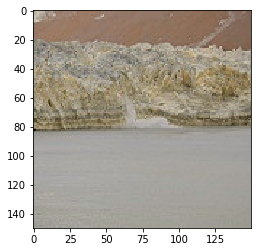

In [10]:
#plotting a test image
plt.imshow(img_train[1])
print(img_train_labels[1])

**Processing the input**

In [11]:
#Converting the list of images to numpy array to feed to our network

img_train = np.array(img_train)
img_train_labels = np.asarray(img_train_labels)
img_test = np.array(img_test)
img_test_labels = np.asarray(img_test_labels)

print(img_train_labels.shape)
print(img_train.shape)
print(img_test_labels.shape)
print(img_test.shape)

(14928,)
(14928, 150, 150, 3)
(3000,)
(3000, 150, 150, 3)


In [0]:

#Splitting into train and validation set

x_train, x_test, y_train, y_test = train_test_split(img_train, img_train_labels, test_size=0.2, shuffle=True, random_state=10)

#Pre-processing the input
x_train, x_test = x_train / 255.0, x_test / 255.0
img_test = img_test / 255.0

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11942, 150, 150, 3)
(11942,)
(2986, 150, 150, 3)
(2986,)


**Defining the model**

->Here, I have defined 2 CNN networks.(use any one of them)

In [14]:
#Defining the convolutional neural network
#16 epoch 81.93% accuracy

model = Sequential([
    
    #Convolutional layers
    
    Conv2D(16, kernel_size=(3,3), strides=(2,2), input_shape=(150,150,3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(30, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(1,1)),
    Dropout(0.15),
    Conv2D(52, kernel_size=(5,5), strides=(2,2), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(84, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    Dropout(0.25),
    Flatten(),
    
    #Linear Layers
    
   Dense(100, activation='relu'),
   Dropout(0.25),
   Dense(30, activation='relu'),
   Dropout(0.25),
   Dense(6, activation='softmax')
  
])


W0721 12:50:30.584051 139968574109568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Defining the convolutional neural network
#27 epoch - 82.57%
model_v2 = Sequential([
    
    #Convolutional layers
    
    Conv2D(10, kernel_size=(3,3), strides=(2,2), input_shape=(150,150,3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(5,5), strides=(2,2)),
    Conv2D(35, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Dropout(0.15),
    Conv2D(50, kernel_size=(5,5), strides=(1,1), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(80, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    Dropout(0.25),
    Flatten(),
    
    #Linear Layers
    
    Dense(120, activation='relu'),
    Dropout(0.25),
    Dense(60, activation='relu'),
    Dropout(0.25),
    Dense(6, activation='softmax')
  
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 16)        448       
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 30)        12030     
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 30)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 34, 30)        0

**Training the model**

->Here, I use 'adam' optimizer and 'cross entropy' as loss function.  
->I am training the model for 20 epochs

In [0]:
#Setting the training params
#Play with the params...

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Training the model

trained_model = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

print('')
print('Test accuracy')
model.evaluate(img_test, img_test_labels)

Train on 11942 samples, validate on 2986 samples
Epoch 1/25
11942/11942 [==============================] - 12s 1ms/sample - loss: 1.2702 - acc: 0.4773 - val_loss: 1.1894 - val_acc: 0.5489
Epoch 2/25
11942/11942 [==============================] - 9s 733us/sample - loss: 1.0117 - acc: 0.5965 - val_loss: 0.9808 - val_acc: 0.6705
Epoch 3/25
11942/11942 [==============================] - 9s 774us/sample - loss: 0.8975 - acc: 0.6616 - val_loss: 0.8586 - val_acc: 0.7066
Epoch 4/25
11942/11942 [==============================] - 10s 806us/sample - loss: 0.7852 - acc: 0.7148 - val_loss: 0.8230 - val_acc: 0.7314
Epoch 5/25
11942/11942 [==============================] - 9s 795us/sample - loss: 0.7087 - acc: 0.7507 - val_loss: 0.7589 - val_acc: 0.7364
Epoch 6/25
11942/11942 [==============================] - 10s 825us/sample - loss: 0.6485 - acc: 0.7824 - val_loss: 0.7359 - val_acc: 0.7478
Epoch 7/25
11942/11942 [==============================] - 9s 759us/sample - loss: 0.5834 - acc: 0.7974 - val_l

[0.5865223539595803, 0.79933333]

**Visualisations**

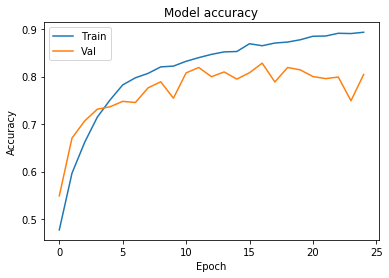

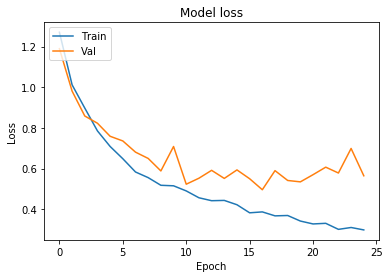

In [19]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

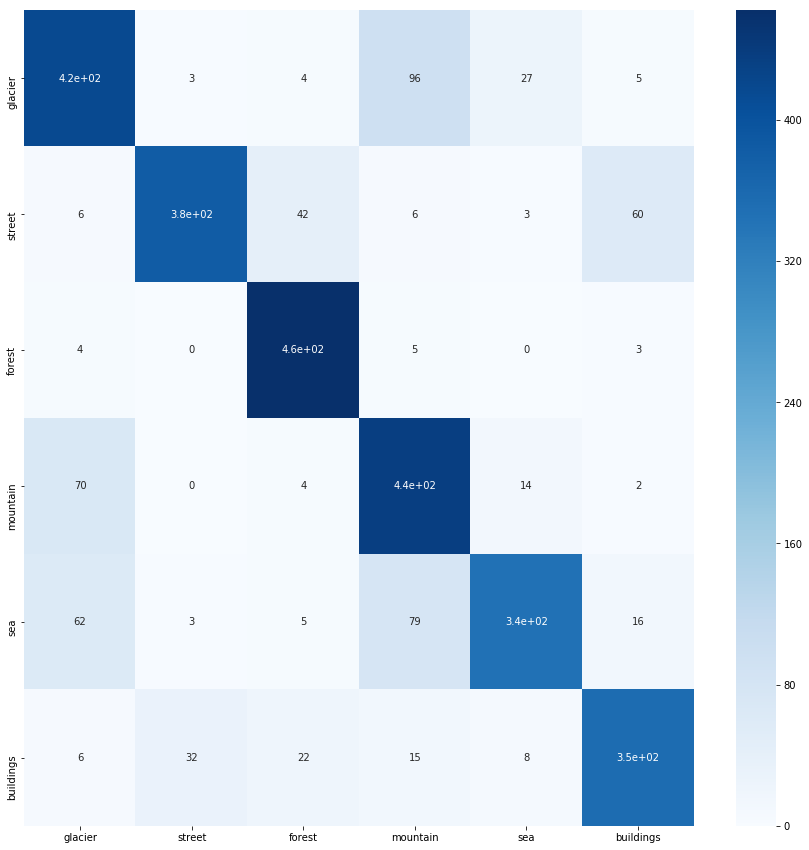

In [20]:
#Plotting a heatmap using the confusion matrix
pred = model.predict(img_test)
p = np.argmax(pred, axis=1)

results = confusion_matrix(img_test_labels, p) 

df_cm = pd.DataFrame(results, index = [i for i in os.listdir("seg_train")], columns = [i for i in os.listdir("seg_train")])
plt.figure(figsize = (15,15))

sn.heatmap(df_cm, annot=True, cmap="Blues")

**Insights from  the visualisations**

1)From the graph:  
        ->In the 'Model Loss' graph we can see that after around 16 epoch, validation loss begins to increase.
           so, it is good to stop training the model there to prevent overfitting.
  
2)From the heatmap:  
        ->We can see that there is large error in deciding between a mountain and glacier, this may be because several
            icy mountain may resemble glacier or vice-versa.  
        ->Many misclassifications also can be seen in street and building, as a street image might contain buildings.